In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [256]:
def define_corners(cX, cY):
    a = np.array([[-cX, cY]]).T
    b = np.array([[-cX, -cY]]).T
    c = np.array([[cX, -cY]]).T
    d = np.array([[cX, cY]]).T
    return a, b, c, d


def rotate_corners(rotation_matrix, corners):
    a, b, c, d = corners
    ap = np.dot(rotation_matrix, a)
    bp = np.dot(rotation_matrix, b)
    cp = np.dot(rotation_matrix, c)
    dp = np.dot(rotation_matrix, d)
    return ap, bp, cp, dp


def growth_length(P, growth_vector, point_line, vec_director):
    vec_director = vec_director/np.linalg.norm(vec_director)
    M = np.concatenate([vec_director, -growth_vector], axis=1)
    x = np.linalg.solve(M, P-point_line)
    return x[1,0]


def find_scale(objective_point, side_points, growth_vector):
    growth_vector = growth_vector/np.linalg.norm(growth_vector)
    initial_point, destination_point = side_points
    vector_director = destination_point - initial_point
    point_in_line = objective_point + growth_length(objective_point, growth_vector, initial_point, vector_director)*growth_vector
    scale = objective_point[0,0]/point_in_line[0,0]
    return scale

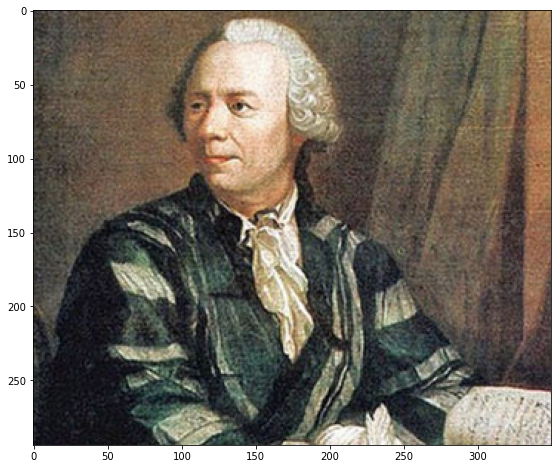

In [217]:
im = cv2.imread('sample_picture_03.jpg')

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im[:, :, [2,1,0]])

In [218]:
(h, w) = im.shape[:2]
(cX, cY) = (w//2, h//2)

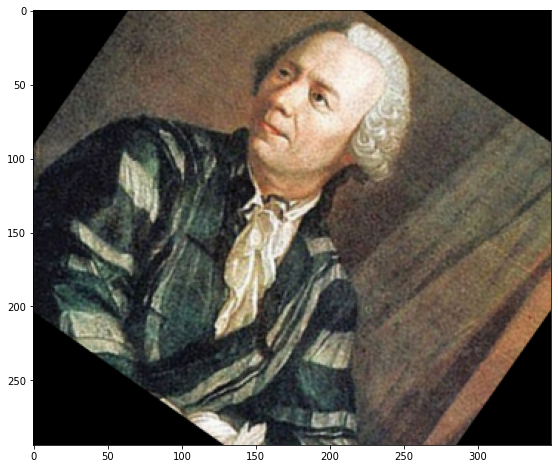

In [265]:
theta = np.pi/8
theta = -np.pi*35/180

M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated[:, :, [2,1,0]])

In [258]:
rotation_matrix = np.array(
    [
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]
)

a, b, c, d = define_corners(cX, cY)
ap, bp, cp, dp = rotate_corners(rotation_matrix, (a, b, c, d))

In [259]:
if theta > 0:
    scale_up_a = find_scale(a, (ap, dp), np.array([[-w, h]]).T)
    scale_up_b = find_scale(b, (bp, ap), np.array([[-w, -h]]).T)
else:
    scale_up_a = find_scale(a, (bp, ap), np.array([[-w, h]]).T)
    scale_up_b = find_scale(b, (bp, ap), np.array([[-w, -h]]).T)

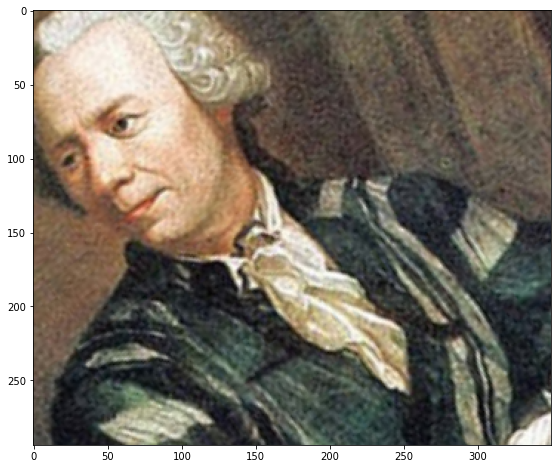

In [260]:
max_scale = max([scale_up_a, scale_up_b])
M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, max_scale)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated[:, :, [2,1,0]])

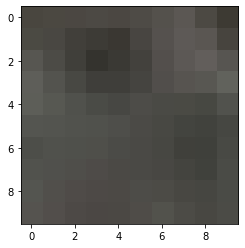

In [262]:
plt.imshow(im_rotated[h-10:, :10, :][:, :, [2,1,0]])